In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import gridspec
import ast
import os
os.chdir('/home/bojk/Data/') #this is when opened in '/home/bojk/Data/notebooks' on linux Quakelab
import sys
sys.path.append('/home/bojk/Data/minimeta_pyfiles/')
import imp
import HTSeq
from scipy.stats import powerlaw
#import minimetagenome_analysis as minimeta

import mock_metagenome_creation as mock
imp.reload(mock)
#import reassembly as rea
#import subcluster_bins as sub
#import checkm_out_plot as cop
#import checkm_out as co

import matplotlib as mpl
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['axes.titlesize'] = 15
mpl.rcParams['figure.titlesize'] = 18
mpl.rcParams['legend.fontsize'] = 14

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
"""maindir = "Mock/Archaea_illuminaHS_low<20contigs/"
kmerdf = pd.read_pickle(maindir+'stats/kmerdf__feb15.pickle')
contigdf = pd.read_pickle(maindir+'stats/contigdf__feb15.pickle')
statsdf = pd.read_pickle(maindir+'stats/statsdf__feb15.pickle')"""

In [ ]:
"""imp.reload(mock)
maindir = "Mock/Archaea_illuminaHS_low<20contigs/"
contig7mer,k7mer = mock.make_kmertable_from_fasta_contigs(maindir+'metagenome_from_allgenomes__feb15.fasta',7,maindir+'stats/')    """

In [ ]:
k7mer.head()

In [2]:
imp.reload(mock)
maindir = "Mock/Archaea_illuminaHS_low<20contigs/"
statsdf = pd.read_pickle(maindir+'stats/statsdf__feb15.pickle')
#tsnedf_7main,optimal7df,hdbsweep7 = mock.perform_complete_analysis(k7mer,contig7mer,statsdf,maindir,'feb15k7mers')

In [9]:
pcdone = list(set([4,4,4,5,6,5,5,6,7]))
lispc = [2,3,4,5,6,7,8]
[lispc.remove(f) for f in pcdone]

[None, None, None, None]

In [18]:
optimal5df = pd.read_pickle(maindir+'stats/feb15_optimalValues_perPC')
optimal6df = pd.read_pickle(maindir+'stats/feb15k6mers_optimalValues_perPC')
optimal7df = pd.read_pickle(maindir+'stats/feb15k7mers_optimalValues_perPC')

Max V-measure = 0.849, with 234 PCs and minimum cluster size of 145 contigs.
----------------------------------------------------
Sequence-based average genome recovery is 47.4%
Median genome recovery is 53.0%
Average recovery of clustered genomes is 63.66%
Median recovery of clustered genomes is 67.60%
Adjusted rand index = 0.058
Number of unseen genomes: 11/44, or 25.0%
----------------------------------------------------
Max V-measure = 0.865, with 113 PCs and minimum cluster size of 188 contigs.
----------------------------------------------------
Sequence-based average genome recovery is 49.5%
Median genome recovery is 63.7%
Average recovery of clustered genomes is 70.99%
Median recovery of clustered genomes is 72.22%
Adjusted rand index = 0.117
Number of unseen genomes: 13/44, or 29.55%
----------------------------------------------------
Max V-measure = 0.904, with 162 PCs and minimum cluster size of 145 contigs.
2681812914
----------------------------------------------------
Se

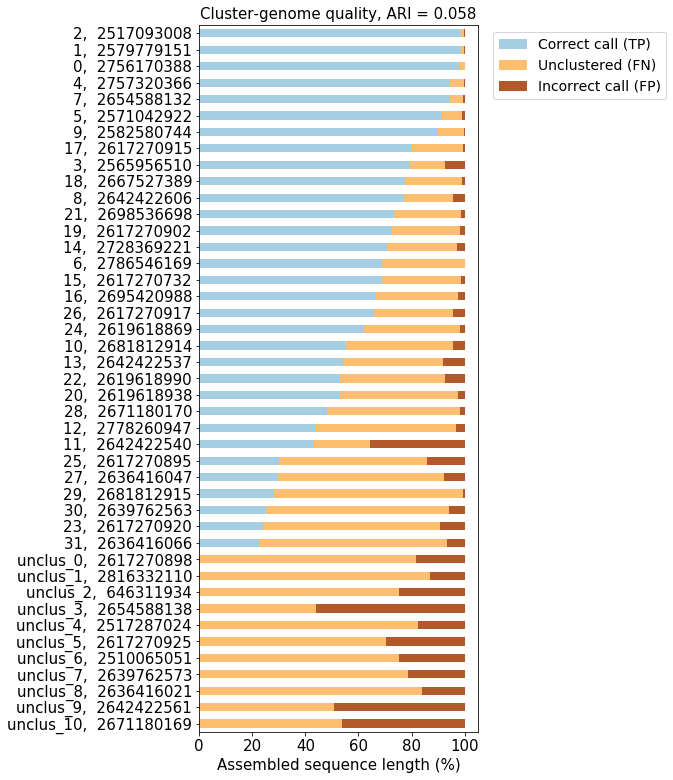

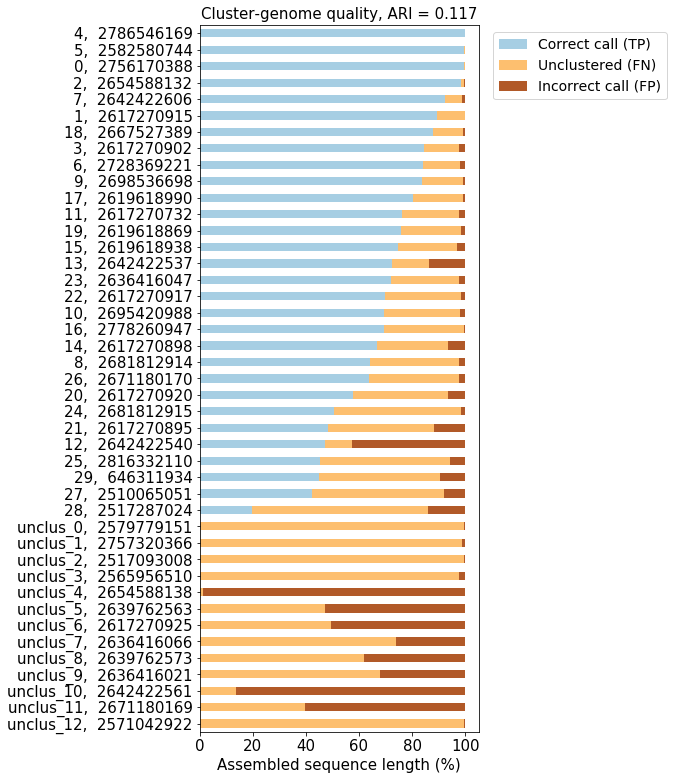

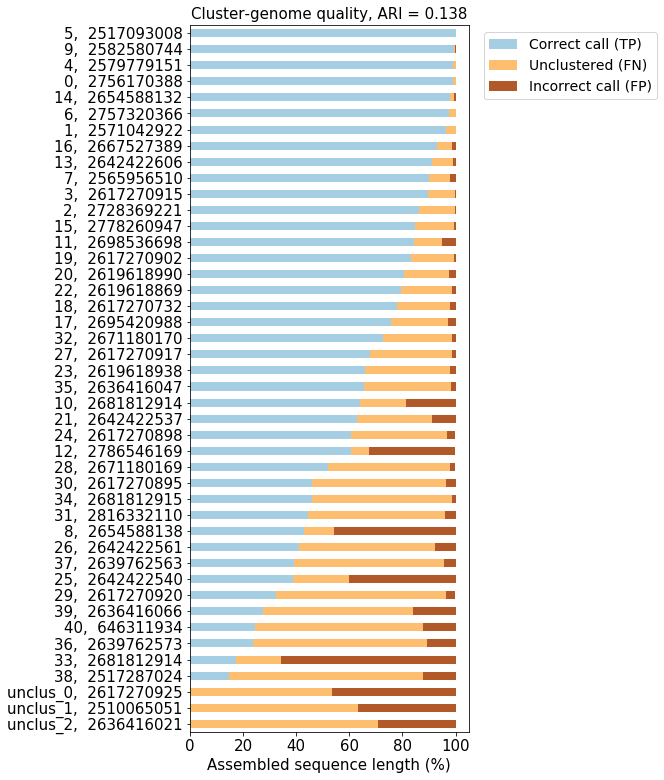

In [21]:
tsne_5merOpt, stats5merOpt = mock.make_Opt_tSNE(optimal5df,maindir,'stats/feb15_all_tSNEs','feb15_5mer')  
tsne_6merOpt, stats6merOpt = mock.make_Opt_tSNE(optimal6df,maindir,'stats/feb15k6mers_all_tSNEs','feb15_6mer')  
tsne_7merOpt, stats7merOpt = mock.make_Opt_tSNE(optimal7df,maindir,'stats/feb15k7mers_all_tSNEs','feb15_7mer')    

In [12]:
imp.reload(mock)
subfolder = 'feb15_7mers_optimal'
savename = 'feb15_7mers'
#mock.plot_optimal_clustering(tsne_7merOpt,stats7merOpt,maindir,subfolder,savename)

In [28]:
sankey


<module 'pySankey' from '/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/pySankey/__init__.py'>

AttributeError: module 'pySankey' has no attribute 'san'

In [ ]:
sankey.s

In [88]:
#tsne_7merOpt[['True_label','DBclusternum']].unique()
#set(tsne_7merOpt['DBclusternum'].astype(str))


Text(0.5, 1.0, '7-mers')

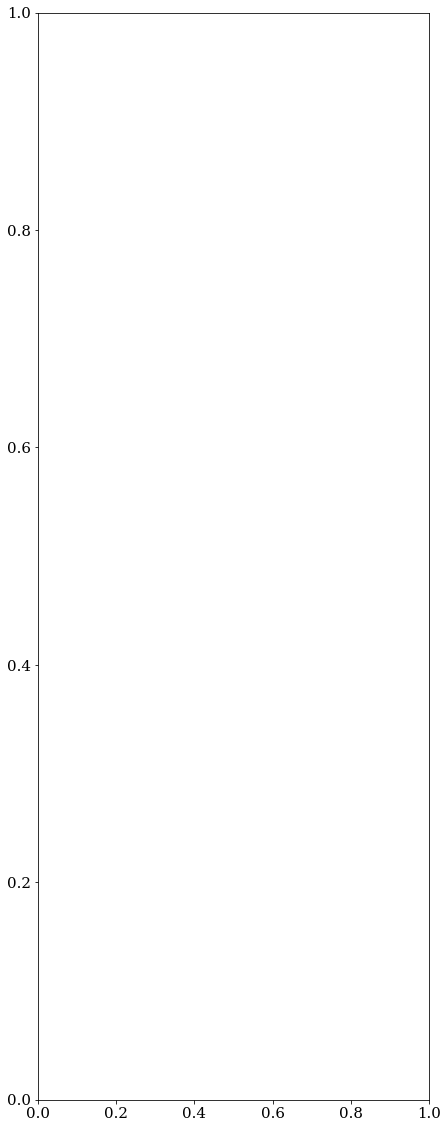

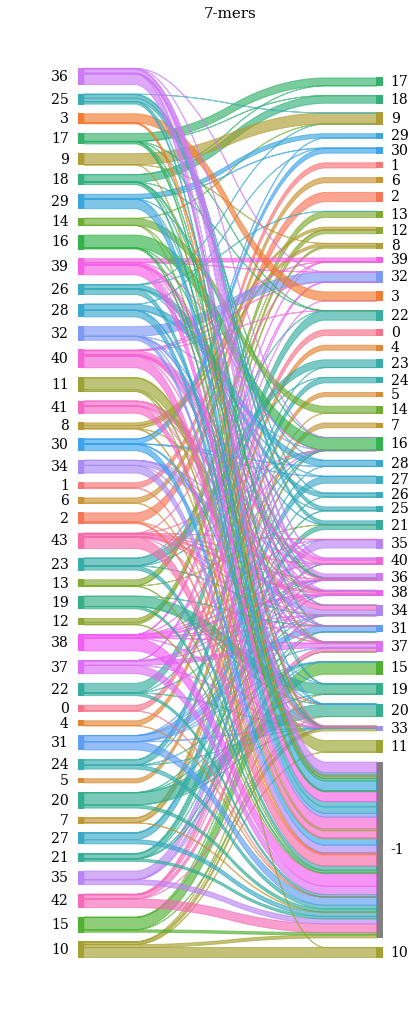

In [98]:
import ipyparallel as ipp
c = ipp.Client()
c.ids

def rgb_to_hex(list_vals):
    hexval=[]
    for r in values:
        r *=255
        hexval.append('#%02X%02X%02X' % (int(round(r[0]*255)),int(round(r[1]*255)),int(round(r[2]*255))))
    return hexval

tsne_7merOpt
from pySankey import sankey
imp.reload(sankey)
keys = [str(f) for f in set(list(tsne_7merOpt['True_label'].unique())+list(tsne_7merOpt['DBclusternum'].unique()))]
values=sns.color_palette('husl',len(keys))
values_hex = rgb_to_hex(values)
colors = dict(zip(keys,values_hex))
colors['-1']='gray'
f,ax = plt.subplots(figsize=(7,20))
figname = 'feb15_7mers_sankey'
sankey.sankey(tsne_7merOpt['True_label'].astype(str),tsne_7merOpt['DBclusternum'].astype(str)
              ,aspect=40
             ,figure_name=figname,colorDict=colors,ax=ax)
plt.title('7-mers')

#f.savefig(maindir+'plots/.png')
#f.savefig(maindir+'plots/feb15_7mers_sankey.pdf')

In [99]:
def sankey(left, right, leftWeight=None, rightWeight=None, colorDict=None,
           leftLabels=None, rightLabels=None, aspect=4, rightColor=False,
           fontsize=14, figureName=None, closePlot=False):
    '''
    Make Sankey Diagram showing flow from left-->right
    Inputs:
        left = NumPy array of object labels on the left of the diagram
        right = NumPy array of corresponding labels on the right of the diagram
            len(right) == len(left)
        leftWeight = NumPy array of weights for each strip starting from the
            left of the diagram, if not specified 1 is assigned
        rightWeight = NumPy array of weights for each strip starting from the
            right of the diagram, if not specified the corresponding leftWeight
            is assigned
        colorDict = Dictionary of colors to use for each label
            {'label':'color'}
        leftLabels = order of the left labels in the diagram
        rightLabels = order of the right labels in the diagram
        aspect = vertical extent of the diagram in units of horizontal extent
        rightColor = If true, each strip in the diagram will be be colored
                    according to its left label
    Ouput:
        None
    '''
    if leftWeight is None:
        leftWeight = []
    if rightWeight is None:
        rightWeight = []
    if leftLabels is None:
        leftLabels = []
    if rightLabels is None:
        rightLabels = []
    # Check weights
    if len(leftWeight) == 0:
        leftWeight = np.ones(len(left))

    if len(rightWeight) == 0:
        rightWeight = leftWeight

    plt.figure()
    plt.rc('text', usetex=False)
    plt.rc('font', family='serif')

    # Create Dataframe
    if isinstance(left, pd.Series):
        left = left.reset_index(drop=True)
    if isinstance(right, pd.Series):
        right = right.reset_index(drop=True)
    dataFrame = pd.DataFrame({'left': left, 'right': right, 'leftWeight': leftWeight,
                              'rightWeight': rightWeight}, index=range(len(left)))

    if len(dataFrame[(dataFrame.left.isnull()) | (dataFrame.right.isnull())]):
        raise NullsInFrame('Sankey graph does not support null values.')

    # Identify all labels that appear 'left' or 'right'
    allLabels = pd.Series(np.r_[dataFrame.left.unique(), dataFrame.right.unique()]).unique()

    # Identify left labels
    if len(leftLabels) == 0:
        leftLabels = pd.Series(dataFrame.left.unique()).unique()
    else:
        check_data_matches_labels(leftLabels, dataFrame['left'], 'left')

    # Identify right labels
    if len(rightLabels) == 0:
        rightLabels = pd.Series(dataFrame.right.unique()).unique()
    else:
        check_data_matches_labels(leftLabels, dataFrame['right'], 'right')
    # If no colorDict given, make one
    if colorDict is None:
        colorDict = {}
        palette = "hls"
        colorPalette = sns.color_palette(palette, len(allLabels))
        for i, label in enumerate(allLabels):
            colorDict[label] = colorPalette[i]
    else:
        missing = [label for label in allLabels if label not in colorDict.keys()]
        if missing:
            msg = "The colorDict parameter is missing values for the following labels : "
            msg += '{}'.format(', '.join(missing))
            raise ValueError(msg)

    # Determine widths of individual strips
    ns_l = defaultdict()
    ns_r = defaultdict()
    for leftLabel in leftLabels:
        leftDict = {}
        rightDict = {}
        for rightLabel in rightLabels:
            leftDict[rightLabel] = dataFrame[(dataFrame.left == leftLabel) & (dataFrame.right == rightLabel)].leftWeight.sum()
            rightDict[rightLabel] = dataFrame[(dataFrame.left == leftLabel) & (dataFrame.right == rightLabel)].rightWeight.sum()
        ns_l[leftLabel] = leftDict
        ns_r[leftLabel] = rightDict

    # Determine positions of left label patches and total widths
    leftWidths = defaultdict()
    for i, leftLabel in enumerate(leftLabels):
        myD = {}
        myD['left'] = dataFrame[dataFrame.left == leftLabel].leftWeight.sum()
        if i == 0:
            myD['bottom'] = 0
            myD['top'] = myD['left']
        else:
            myD['bottom'] = leftWidths[leftLabels[i - 1]]['top'] + 0.02 * dataFrame.leftWeight.sum()
            myD['top'] = myD['bottom'] + myD['left']
            topEdge = myD['top']
        leftWidths[leftLabel] = myD

    # Determine positions of right label patches and total widths
    rightWidths = defaultdict()
    for i, rightLabel in enumerate(rightLabels):
        myD = {}
        myD['right'] = dataFrame[dataFrame.right == rightLabel].rightWeight.sum()
        if i == 0:
            myD['bottom'] = 0
            myD['top'] = myD['right']
        else:
            myD['bottom'] = rightWidths[rightLabels[i - 1]]['top'] + 0.02 * dataFrame.rightWeight.sum()
            myD['top'] = myD['bottom'] + myD['right']
            topEdge = myD['top']
        rightWidths[rightLabel] = myD

    # Total vertical extent of diagram
    xMax = topEdge / aspect

    # Draw vertical bars on left and right of each  label's section & print label
    for leftLabel in leftLabels:
        plt.fill_between(
            [-0.02 * xMax, 0],
            2 * [leftWidths[leftLabel]['bottom']],
            2 * [leftWidths[leftLabel]['bottom'] + leftWidths[leftLabel]['left']],
            color=colorDict[leftLabel],
            alpha=0.99
        )
        plt.text(
            -0.05 * xMax,
            leftWidths[leftLabel]['bottom'] + 0.5 * leftWidths[leftLabel]['left'],
            leftLabel,
            {'ha': 'right', 'va': 'center'},
            fontsize=fontsize
        )
    for rightLabel in rightLabels:
        plt.fill_between(
            [xMax, 1.02 * xMax], 2 * [rightWidths[rightLabel]['bottom']],
            2 * [rightWidths[rightLabel]['bottom'] + rightWidths[rightLabel]['right']],
            color=colorDict[rightLabel],
            alpha=0.99
        )
        plt.text(
            1.05 * xMax,
            rightWidths[rightLabel]['bottom'] + 0.5 * rightWidths[rightLabel]['right'],
            rightLabel,
            {'ha': 'left', 'va': 'center'},
            fontsize=fontsize
        )

    # Plot strips
    for leftLabel in leftLabels:
        for rightLabel in rightLabels:
            labelColor = leftLabel
            if rightColor:
                labelColor = rightLabel
            if len(dataFrame[(dataFrame.left == leftLabel) & (dataFrame.right == rightLabel)]) > 0:
                # Create array of y values for each strip, half at left value,
                # half at right, convolve
                ys_d = np.array(50 * [leftWidths[leftLabel]['bottom']] + 50 * [rightWidths[rightLabel]['bottom']])
                ys_d = np.convolve(ys_d, 0.05 * np.ones(20), mode='valid')
                ys_d = np.convolve(ys_d, 0.05 * np.ones(20), mode='valid')
                ys_u = np.array(50 * [leftWidths[leftLabel]['bottom'] + ns_l[leftLabel][rightLabel]] + 50 * [rightWidths[rightLabel]['bottom'] + ns_r[leftLabel][rightLabel]])
                ys_u = np.convolve(ys_u, 0.05 * np.ones(20), mode='valid')
                ys_u = np.convolve(ys_u, 0.05 * np.ones(20), mode='valid')

                # Update bottom edges at each label so next strip starts at the right place
                leftWidths[leftLabel]['bottom'] += ns_l[leftLabel][rightLabel]
                rightWidths[rightLabel]['bottom'] += ns_r[leftLabel][rightLabel]
                plt.fill_between(
                    np.linspace(0, xMax, len(ys_d)), ys_d, ys_u, alpha=0.65,
                    color=colorDict[labelColor]
                )
    plt.gca().axis('off')
    plt.gcf().set_size_inches(6, 6)
    if figureName != None:
        plt.savefig("{}.png".format(figureName), bbox_inches='tight', dpi=150)
    if closePlot:
        plt.close()

NameError: name 'closePlot' is not defined

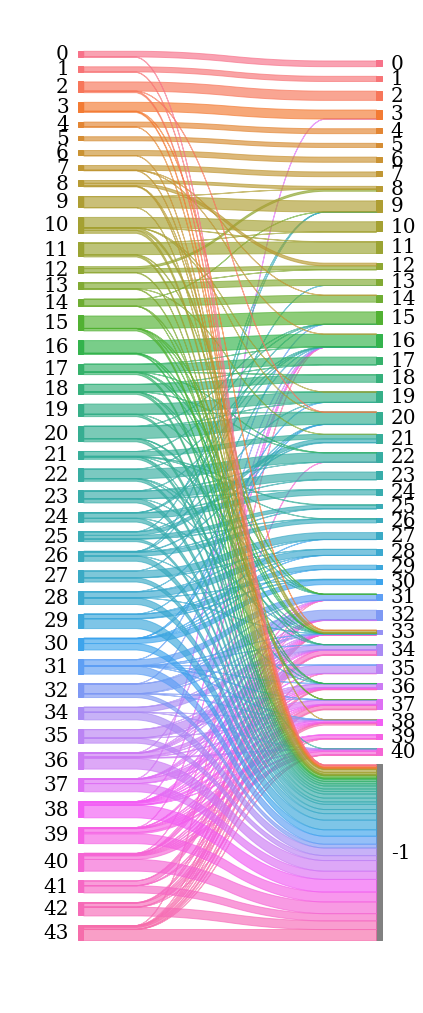

In [201]:
from collections import defaultdict
left = tsne_7merOpt['True_label']
right = tsne_7merOpt['DBclusternum']

leftWeight = None
rightWeight = None
leftLabels = None
rightLabels = None
rightColor = False
aspect = 20
fontsize=20
figname = 'feb15_7mers_sankey_bot'
figureName = figname

keys = [str(f) for f in set(list(tsne_7merOpt['True_label'].unique())+list(tsne_7merOpt['DBclusternum'].unique()))]
keys = list(set(list(tsne_7merOpt['True_label'].unique())+list(tsne_7merOpt['DBclusternum'].unique())))
values=sns.color_palette('husl',len(keys))
values_hex = rgb_to_hex(values)
colors = dict(zip(keys,values_hex))
colors[-1]='gray'
colorDict = colors

if leftWeight is None:
    leftWeight = []
if rightWeight is None:
    rightWeight = []
if leftLabels is None:
    leftLabels = []
if rightLabels is None:
    rightLabels = []
# Check weights
if len(leftWeight) == 0:
    leftWeight = np.ones(len(left))

if len(rightWeight) == 0:
    rightWeight = leftWeight

plt.figure()
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

# Create Dataframe
if isinstance(left, pd.Series):
    left = left.reset_index(drop=True)
if isinstance(right, pd.Series):
    right = right.reset_index(drop=True)
dataFrame = pd.DataFrame({'left': left, 'right': right, 'leftWeight': leftWeight,
                          'rightWeight': rightWeight}, index=range(len(left)))

if len(dataFrame[(dataFrame.left.isnull()) | (dataFrame.right.isnull())]):
    raise NullsInFrame('Sankey graph does not support null values.')

# Identify all labels that appear 'left' or 'right'
allLabels = pd.Series(np.r_[dataFrame.left.unique(), dataFrame.right.unique()]).unique()

# Identify left labels
if len(leftLabels) == 0:
    leftLabels = pd.Series(dataFrame.left.unique()).unique()
else:
    check_data_matches_labels(leftLabels, dataFrame['left'], 'left')

# Identify right labels
if len(rightLabels) == 0:
    rightLabels = pd.Series(dataFrame.right.unique()).unique()
else:
    check_data_matches_labels(leftLabels, dataFrame['right'], 'right')
# If no colorDict given, make one
if colorDict is None:
    colorDict = {}
    palette = "hls"
    colorPalette = sns.color_palette(palette, len(allLabels))
    for i, label in enumerate(allLabels):
        colorDict[label] = colorPalette[i]
else:
    missing = [label for label in allLabels if label not in colorDict.keys()]
    if missing:
        msg = "The colorDict parameter is missing values for the following labels : "
        msg += '{}'.format(', '.join(missing))
        raise ValueError(msg)

# Determine widths of individual strips
ns_l = defaultdict()
ns_r = defaultdict()
for leftLabel in leftLabels:
    leftDict = {}
    rightDict = {}
    for rightLabel in rightLabels:
        leftDict[rightLabel] = dataFrame[(dataFrame.left == leftLabel) & (dataFrame.right == rightLabel)].leftWeight.sum()
        rightDict[rightLabel] = dataFrame[(dataFrame.left == leftLabel) & (dataFrame.right == rightLabel)].rightWeight.sum()
    ns_l[leftLabel] = leftDict
    ns_r[leftLabel] = rightDict

# Determine positions of left label patches and total widths
leftWidths = defaultdict()
leftLabels[::-1].sort()
rightLabels[::-1].sort()
rightLabels = rightLabels[[-1]+list(range(len(rightLabels)-1))]
for i, leftLabel in enumerate(leftLabels):
    #print(leftLabel)
    myD = {}
    myD['left'] = dataFrame[dataFrame.left == leftLabel].leftWeight.sum()
    if i == 0:
        myD['bottom'] = 0
        myD['top'] = myD['left']
    else:
        myD['bottom'] = leftWidths[leftLabels[i - 1]]['top'] + 0.02 * dataFrame.leftWeight.sum()
        myD['top'] = myD['bottom'] + myD['left']
        topEdge = myD['top']
    leftWidths[leftLabel] = myD

# Determine positions of right label patches and total widths
rightWidths = defaultdict()
for i, rightLabel in enumerate(rightLabels):
    myD = {}
    myD['right'] = dataFrame[dataFrame.right == rightLabel].rightWeight.sum()
    if i == 0:
        myD['bottom'] = 0
        myD['top'] = myD['right']
    else:
        myD['bottom'] = rightWidths[rightLabels[i - 1]]['top'] + 0.02 * dataFrame.rightWeight.sum()
        myD['top'] = myD['bottom'] + myD['right']
        topEdge = myD['top']
    rightWidths[rightLabel] = myD

# Total vertical extent of diagram
xMax = topEdge / aspect

# Draw vertical bars on left and right of each  label's section & print label
for leftLabel in leftLabels:
    plt.fill_between(
        [-0.02 * xMax, 0],
        2 * [leftWidths[leftLabel]['bottom']],
        2 * [leftWidths[leftLabel]['bottom'] + leftWidths[leftLabel]['left']],
        color=colorDict[leftLabel],
        alpha=0.99
    )
    plt.text(
        -0.05 * xMax,
        leftWidths[leftLabel]['bottom'] + 0.5 * leftWidths[leftLabel]['left'],
        leftLabel,
        {'ha': 'right', 'va': 'center'},
        fontsize=fontsize
    )
for rightLabel in rightLabels:
    plt.fill_between(
        [xMax, 1.02 * xMax], 2 * [rightWidths[rightLabel]['bottom']],
        2 * [rightWidths[rightLabel]['bottom'] + rightWidths[rightLabel]['right']],
        color=colorDict[rightLabel],
        alpha=0.99
    )
    plt.text(
        1.05 * xMax,
        rightWidths[rightLabel]['bottom'] + 0.5 * rightWidths[rightLabel]['right'],
        rightLabel,
        {'ha': 'left', 'va': 'center'},
        fontsize=fontsize
    )

# Plot strips
for leftLabel in leftLabels:
    for rightLabel in rightLabels:
        labelColor = leftLabel
        if rightColor:
            labelColor = rightLabel
        if len(dataFrame[(dataFrame.left == leftLabel) & (dataFrame.right == rightLabel)]) > 0:
            # Create array of y values for each strip, half at left value,
            # half at right, convolve
            ys_d = np.array(50 * [leftWidths[leftLabel]['bottom']] + 50 * [rightWidths[rightLabel]['bottom']])
            ys_d = np.convolve(ys_d, 0.05 * np.ones(20), mode='valid')
            ys_d = np.convolve(ys_d, 0.05 * np.ones(20), mode='valid')
            ys_u = np.array(50 * [leftWidths[leftLabel]['bottom'] + ns_l[leftLabel][rightLabel]] + 50 * [rightWidths[rightLabel]['bottom'] + ns_r[leftLabel][rightLabel]])
            ys_u = np.convolve(ys_u, 0.05 * np.ones(20), mode='valid')
            ys_u = np.convolve(ys_u, 0.05 * np.ones(20), mode='valid')

            # Update bottom edges at each label so next strip starts at the right place
            leftWidths[leftLabel]['bottom'] += ns_l[leftLabel][rightLabel]
            rightWidths[rightLabel]['bottom'] += ns_r[leftLabel][rightLabel]
            plt.fill_between(
                np.linspace(0, xMax, len(ys_d)), ys_d, ys_u, alpha=0.65,
                color=colorDict[labelColor]
            )
plt.gca().axis('off')
plt.gcf().set_size_inches(6, 18)
if figureName != None:
    plt.savefig("{}.png".format(figureName), bbox_inches='tight', dpi=150)
    plt.savefig("{}.pdf".format(figureName), bbox_inches='tight', dpi=150)
if closePlot:
    plt.close()

In [192]:
tsne_5merOpt.head()

,0,1,Sequence length,GC,genome,DBclusternum,Bin,True_label
2681812914_contig_000,15.210615,3.538543,11391,0.578351,2681812914,-1,-01,10
2681812914_contig_001,2.925643,-16.955935,8136,0.580998,2681812914,10,010,10
2681812914_contig_002,2.223983,-17.091417,6917,0.576984,2681812914,10,010,10
2681812914_contig_003,3.751495,-17.215109,5692,0.596100,2681812914,10,010,10
2681812914_contig_004,0.827038,-19.040472,6149,0.585298,2681812914,10,010,10


In [200]:
import datashader as ds
import datashader.transfer_functions as tf
df = tsne_5merOpt.rename(index=str,columns={0:'xcoo',1:'ycoo'})
cvs = ds.Canvas(plot_width=400, plot_height=400,x_range=(-8,8), y_range=(-8,8), 
                   x_axis_type='linear', y_axis_type='linear')
agg = cvs.points(df, 'xcoo', 'ycoo')
tf.shade(agg, cmap=['lightblue', 'darkblue'], how='log')


AttributeError: module 'PIL._imaging' has no attribute 'crc32'

AttributeError: module 'PIL._imaging' has no attribute 'crc32'

<xarray.Image (ycoo: 400, xcoo: 400)>
array([[         0,          0,          0, ...,          0,          0,
                 0],
       [         0,          0,          0, ..., 4293318829,          0,
                 0],
       [         0,          0,          0, ...,          0,          0,
                 0],
       ...,
       [         0,          0,          0, ...,          0,          0,
                 0],
       [         0,          0,          0, ...,          0,          0,
                 0],
       [         0,          0,          0, ...,          0,          0,
                 0]], dtype=uint32)
Coordinates:
  * ycoo     (ycoo) float64 -7.98 -7.94 -7.9 -7.86 -7.82 ... 7.86 7.9 7.94 7.98
  * xcoo     (xcoo) float64 -7.98 -7.94 -7.9 -7.86 -7.82 ... 7.86 7.9 7.94 7.98

In [196]:
img

AttributeError: module 'PIL._imaging' has no attribute 'crc32'

AttributeError: module 'PIL._imaging' has no attribute 'crc32'

<xarray.Image (ycoo: 400, xcoo: 400)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
Coordinates:
  * ycoo     (ycoo) float64 -23.53 -23.41 -23.28 -23.15 ... 26.21 26.34 26.46
  * xcoo     (xcoo) float64 -23.86 -23.69 -23.52 -23.35 ... 44.34 44.51 44.68

In [184]:
leftWidths
#leftWidths[]
leftLabels[::-1].sort()

rightLabels[:-1]
rightLabels[[-1]+list(range(len(rightLabels)-1))]
#list(range(len(rightLabels)))

array([-1, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16,
       15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0])

In [137]:
leftWidths[leftLabels[i - 1]]['top'] + 0.02 * dataFrame.leftWeight.sum()

KeyError: 10

In [134]:
"""def getRGBfromI(RGBint):
    blue =  RGBint & 255
    green = (RGBint >> 8) & 255
    red =   (RGBint >> 16) & 255
    return red, green, blue

def getIfromRGB(rgb):
    red = rgb[0]
    green = rgb[1]
    blue = rgb[2]
    print(red, green, blue)
    RGBint = (red<<16) + (green<<8) + blue
    return RGBint

getIfromRGB(r)"""
r


(0.9647055345598645,
 0.9895434198437888,
 0.9740896186266301,
 0.9647055345598645,
 0.9895434198437888,
 0.9740896186266301,
 0.9647055345598645,
 0.9895434198437888,
 0.9740896186266301,
 0.9647055345598645,
 0.9895434198437888,
 0.9740896186266301,
 0.9647055345598645,
 0.9895434198437888,
 0.9740896186266301,
 0.9647055345598645,
 0.9895434198437888,
 0.9740896186266301,
 0.9647055345598645,
 0.9895434198437888,
 0.9740896186266301,
 0.9647055345598645,
 0.9895434198437888,
 0.9740896186266301,
 0.9647055345598645,
 0.9895434198437888,
 0.9740896186266301,
 0.9647055345598645,
 0.9895434198437888,
 0.9740896186266301,
 0.9647055345598645,
 0.9895434198437888,
 0.9740896186266301,
 0.9647055345598645,
 0.9895434198437888,
 0.9740896186266301,
 0.9647055345598645,
 0.9895434198437888,
 0.9740896186266301,
 0.9647055345598645,
 0.9895434198437888,
 0.9740896186266301,
 0.9647055345598645,
 0.9895434198437888,
 0.9740896186266301,
 0.9647055345598645,
 0.9895434198437888,
 0.9740896186

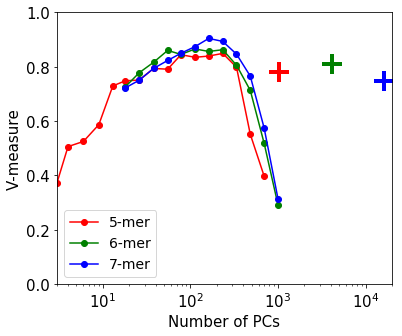

In [19]:
f,ax = plt.subplots(figsize=(6,5))
optimal5df['max'][:-1].plot(style='-o',c='r',ax=ax,label='5-mer')
optimal6df['max'][:-1].plot(style='-o',c='g',ax=ax,label='6-mer')
optimal7df['max'][:-1].plot(style='-o',c='b',ax=ax,label='7-mer')
ax.plot(4**5,optimal5df.iloc[-1,-1],'+r',ms=20,markeredgewidth=4,label=None)
ax.plot(4**6,optimal6df.iloc[-1,-1],'+g',ms=20,markeredgewidth=4,label=None)
ax.plot(4**7,optimal7df.iloc[-1,-1],'+b',ms=20,markeredgewidth=4,label=None)
plt.xscale('log')
plt.legend()
plt.ylim(0,1)
plt.xlim(3,2e4)
plt.xlabel('Number of PCs')
plt.ylabel('V-measure')
f.savefig(maindir+'plots/PC_Vmeasure.png')
f.savefig(maindir+'plots/PC_Vmeasure.pdf')


In [134]:
def perform_PCA(kmer_df,dim):
    x = StandardScaler().fit_transform(kmer_df)
    pca = PCA(n_components=dim)
    principalComp = pca.fit_transform(x)
    princdf = pd.DataFrame(principalComp)
    princdf.index =kmer_df.index
    return(princdf)
def perform_PCA_noScale(kmer_df,dim):
    #x = StandardScaler().fit_transform(kmer_df)
    pca = PCA(n_components=dim)
    principalComp = pca.fit_transform(kmer_df)
    princdf = pd.DataFrame(principalComp)
    princdf.index =kmer_df.index
    return(princdf)

In [135]:
k5PCA = perform_PCA(k5mer,100)
k5PCA_ns = perform_PCA_noScale(k5mer,100)

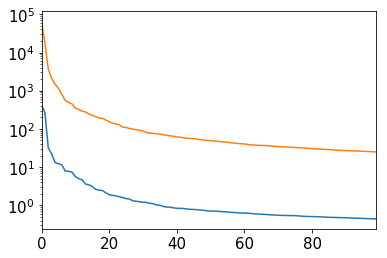

In [139]:
k5PCA.var().plot()
k5PCA_ns.var().plot()
plt.yscale('log')

# no scaling PCA

In [4]:
imp.reload(mock)
maindir = "Mock/Archaea_illuminaHS_low<20contigs/"
k5mer = pd.read_pickle(maindir+'stats/kmerdf__feb15.pickle')
statsdf = pd.read_pickle(maindir+'stats/statsdf__feb15.pickle')
contigdf_withcov = pd.read_pickle(maindir+'stats/contigdf_15feb_MockMetaWithCoverage_20190311_15:02:23')
savename = 'feb15k5merWithAbsCov20190311t15:02:23noScaling2'
keys = ['maindir','savename','coverage_included','scaling']
values = [maindir,savename,'YES',False]
kwds = dict(zip(keys,values))
tsnedf_5main,optimal5df,hdbsweep5 = mock.perform_complete_analysis(k5mer,contigdf_withcov,statsdf,**kwds)

Contig coverage added as dimension
building tSNE of all 1024 dimensions, scaling done


/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


finished building main tSNE, this took 658.75 seconds
performing cluster sweep of tSNE of all 1024 dimensions


/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: Runt

finished cluster sweep of main tSNE, this took 37.77 seconds
Total elapsed time is 11.61 minutes
Performing PCA...
PCA done and saved.
building tSNE of 3 PCs
finished building tSNE of 3 PCs, this took 115.19 seconds
performing cluster sweep of tSNE of 3 PCs


/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: Runt

finished cluster sweep of tSNE with3PCs, this took 39.68 seconds
Total elapsed time is 14.31 minutes
building tSNE of 4 PCs
finished building tSNE of 4 PCs, this took 122.45 seconds
performing cluster sweep of tSNE of 4 PCs


/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: Runt

finished cluster sweep of tSNE with4PCs, this took 39.30 seconds
Total elapsed time is 17.01 minutes
building tSNE of 6 PCs
finished building tSNE of 6 PCs, this took 119.52 seconds
performing cluster sweep of tSNE of 6 PCs


/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: Runt

finished cluster sweep of tSNE with6PCs, this took 40.21 seconds
Total elapsed time is 19.67 minutes
building tSNE of 9 PCs
finished building tSNE of 9 PCs, this took 127.74 seconds
performing cluster sweep of tSNE of 9 PCs


/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: Runt

finished cluster sweep of tSNE with9PCs, this took 40.37 seconds
Total elapsed time is 22.47 minutes
building tSNE of 13 PCs
finished building tSNE of 13 PCs, this took 130.02 seconds
performing cluster sweep of tSNE of 13 PCs


/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: Runt

finished cluster sweep of tSNE with13PCs, this took 38.44 seconds
Total elapsed time is 25.28 minutes
building tSNE of 18 PCs
finished building tSNE of 18 PCs, this took 145.58 seconds
performing cluster sweep of tSNE of 18 PCs


/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: Runt

finished cluster sweep of tSNE with18PCs, this took 39.06 seconds
Total elapsed time is 28.36 minutes
building tSNE of 26 PCs
finished building tSNE of 26 PCs, this took 149.45 seconds
performing cluster sweep of tSNE of 26 PCs
finished cluster sweep of tSNE with26PCs, this took 39.17 seconds
Total elapsed time is 31.50 minutes
building tSNE of 38 PCs
finished building tSNE of 38 PCs, this took 171.60 seconds
performing cluster sweep of tSNE of 38 PCs


/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: Runt

finished cluster sweep of tSNE with38PCs, this took 38.60 seconds
Total elapsed time is 35.00 minutes
building tSNE of 55 PCs
finished building tSNE of 55 PCs, this took 200.77 seconds
performing cluster sweep of tSNE of 55 PCs


/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: Runt

finished cluster sweep of tSNE with55PCs, this took 38.88 seconds
Total elapsed time is 39.00 minutes
building tSNE of 78 PCs
finished building tSNE of 78 PCs, this took 229.96 seconds
performing cluster sweep of tSNE of 78 PCs


/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: Runt

finished cluster sweep of tSNE with78PCs, this took 39.58 seconds
Total elapsed time is 43.49 minutes
building tSNE of 113 PCs
finished building tSNE of 113 PCs, this took 275.21 seconds
performing cluster sweep of tSNE of 113 PCs


/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: Runt

finished cluster sweep of tSNE with113PCs, this took 39.67 seconds
Total elapsed time is 48.74 minutes
building tSNE of 162 PCs
finished building tSNE of 162 PCs, this took 293.68 seconds
performing cluster sweep of tSNE of 162 PCs


/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: Runt

finished cluster sweep of tSNE with162PCs, this took 42.44 seconds
Total elapsed time is 54.34 minutes
building tSNE of 234 PCs
finished building tSNE of 234 PCs, this took 331.79 seconds
performing cluster sweep of tSNE of 234 PCs


/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:941: Runt

finished cluster sweep of tSNE with234PCs, this took 43.19 seconds
Total elapsed time is 60.59 minutes
building tSNE of 336 PCs
finished building tSNE of 336 PCs, this took 383.09 seconds
performing cluster sweep of tSNE of 336 PCs


/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:941: RuntimeWarning: invalid value encountered in double_scalars
  HKC = HKC+nk
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:923: RuntimeWarning: divide by zero encountered in log
  ncn = matrix.T.sum(axis=1).divide(n)
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:941: RuntimeWarning: in

finished cluster sweep of tSNE with336PCs, this took 45.31 seconds
Total elapsed time is 67.73 minutes
building tSNE of 483 PCs
finished building tSNE of 483 PCs, this took 526.32 seconds
performing cluster sweep of tSNE of 483 PCs


/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:941: RuntimeWarning: invalid value encountered in double_scalars
  HKC = HKC+nk
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:941: RuntimeWarning: invalid value encountered in double_scalars
  HKC = HKC+nk
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:941: RuntimeWarning: invalid value encountered in double_scalars
  HKC = HKC+nk
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:941: RuntimeWarning: invalid value encountered in double_scalars
  HKC = HKC+nk
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:941: RuntimeWarning: invalid value encountered in double_scalars
  HKC = HKC+nk
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:941: RuntimeWarning: invalid value encountered in double_scalars
  HKC = HKC+nk
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:941: RuntimeWarning: invalid value encountered in double_scalars
  HKC = HKC+nk
/home/bojk/Da

finished cluster sweep of tSNE with483PCs, this took 46.78 seconds
Total elapsed time is 77.29 minutes
building tSNE of 695 PCs
finished building tSNE of 695 PCs, this took 672.90 seconds
performing cluster sweep of tSNE of 695 PCs
No bin -01 in tSNE58
No bin -01 in tSNE72
No bin -01 in tSNE87
No bin -01 in tSNE102
No bin -01 in tSNE130
No bin -01 in tSNE145
No bin -01 in tSNE159
No bin -01 in tSNE174
No bin -01 in tSNE188
No bin -01 in tSNE203
No bin -01 in tSNE218
No bin -01 in tSNE232
No bin -01 in tSNE246
No bin -01 in tSNE261
No bin -01 in tSNE276
No bin -01 in tSNE290
finished cluster sweep of tSNE with695PCs, this took 39.69 seconds
Total elapsed time is 89.16 minutes
Finished everything.
Total elapsed time is 89.16 minutes


Max V-measure = 0.839, with 234 PCs and minimum cluster size of 159 contigs.


/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:924: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))


----------------------------------------------------
Sequence-based average genome recovery is 47.4%
Median genome recovery is 51.5%
Average recovery of clustered genomes is 61.78%
Median recovery of clustered genomes is 59.07%
Adjusted rand index = 0.064
Number of unseen genomes: 10/44, or 22.73%
----------------------------------------------------


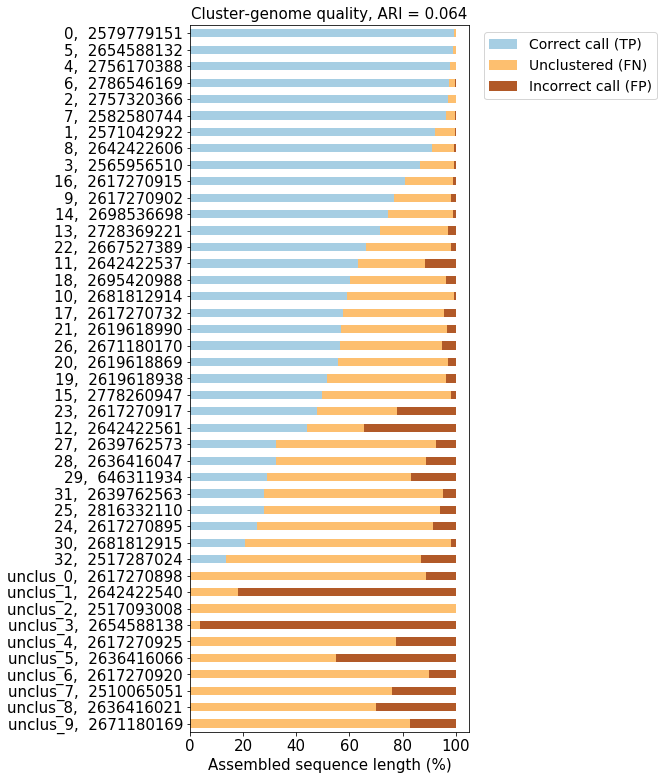

In [7]:
imp.reload(mock)
tsne5AbsCovOpt_ns,stats5absCovOpt_ns = mock.make_Opt_tSNE(optimal5df,maindir,'stats/feb15k5merWithAbsCov20190311t15:02:23noScaling2_all_tSNEs','feb15_5merAbsCovNoScaling')  

Max V-measure = 0.9, with 78 PCs and minimum cluster size of 159 contigs.


/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:924: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))


2816332110
----------------------------------------------------
Sequence-based average genome recovery is 54.7%
Median genome recovery is 64.7%
Average recovery of clustered genomes is 68.81%
Median recovery of clustered genomes is 72.20%
Adjusted rand index = 0.148
Number of unseen genomes: 9/45, or 20.0%
----------------------------------------------------


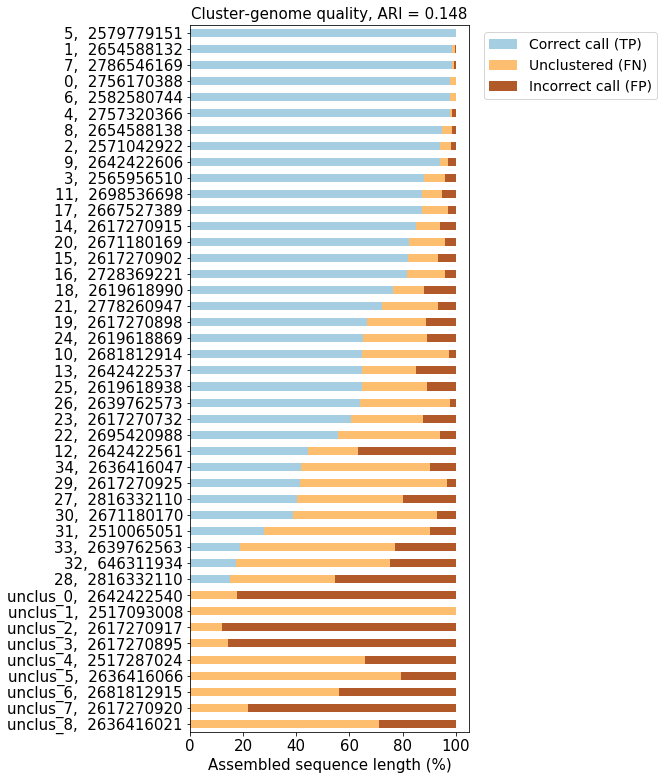

In [11]:
optimal5df_n = optimal5df.copy()
optimal5df_n.loc[78,'max'] = .9

imp.reload(mock)
tsne5AbsCovOpt_ns,stats5absCovOpt_ns = mock.make_Opt_tSNE(optimal5df_n,maindir,'stats/feb15k5merWithAbsCov20190311t15:02:23noScaling2_all_tSNEs','feb15_5merAbsCovNoScaling2')  

In [15]:
#optimal5df_n.loc
hdbsweep5

,hom_eom5mers,com_eom5mers,val_eom5mers,hom_leaf5mers,com_leaf5mers,val_leaf5mers,hom_eom_PC3,com_eom_PC3,val_eom_PC3,hom_leaf_PC3,...,val_eom_PC483,hom_leaf_PC483,com_leaf_PC483,val_leaf_PC483,hom_eom_PC695,com_eom_PC695,val_eom_PC695,hom_leaf_PC695,com_leaf_PC695,val_leaf_PC695
14,0.763314,0.602656,0.673537,0.746602,0.482011,0.585816,0.730594,0.520504,0.607910,0.772733,...,0.477555,0.559777,0.348848,0.429830,0.393558,0.260549,0.313530,0.405338,0.253772,0.312128
29,0.734293,0.713524,0.723760,0.773473,0.598626,0.674909,0.673206,0.568451,0.616410,0.733587,...,0.510583,0.570058,0.434879,0.493376,0.361781,0.279067,0.315086,0.372714,0.279048,0.319150
44,0.471115,0.884608,0.614804,0.783402,0.682630,0.729553,0.669649,0.579692,0.621432,0.721604,...,0.528691,0.588413,0.497013,0.538865,0.361513,0.305373,0.331080,0.374078,0.308827,0.338335
58,0.471115,0.884608,0.614804,0.782404,0.724396,0.752283,0.641067,0.624004,0.632420,0.708728,...,0.544066,0.599735,0.531317,0.563457,0.001450,0.051285,0.002819,0.392738,0.355972,0.373452
72,0.471314,0.890661,0.616430,0.789401,0.752862,0.770699,0.631169,0.642788,0.636925,0.704310,...,0.556927,0.611563,0.563301,0.586441,0.001450,0.051285,0.002819,0.407603,0.394937,0.401170
87,0.471314,0.890661,0.616430,0.782449,0.760152,0.771139,0.626771,0.659710,0.642819,0.700351,...,0.574352,0.620619,0.592704,0.606340,0.001450,0.051285,0.002819,0.384039,0.393963,0.388938
102,0.467768,0.893172,0.613983,0.789855,0.800015,0.794902,0.625688,0.669275,0.646748,0.692515,...,0.592300,0.633837,0.626392,0.630093,0.001450,0.051285,0.002819,0.369074,0.419255,0.392568
116,0.467768,0.893172,0.613983,0.784442,0.802647,0.793440,0.624379,0.677823,0.650004,0.692074,...,0.619486,0.645195,0.671188,0.657935,0.012395,0.229782,0.023522,0.369071,0.446515,0.404116
130,0.467768,0.893172,0.613983,0.782752,0.805981,0.794197,0.620790,0.676980,0.647668,0.683671,...,0.571793,0.650249,0.701182,0.674756,0.001450,0.051285,0.002819,0.358193,0.454547,0.400658
145,0.460684,0.890725,0.607282,0.778683,0.802360,0.790345,0.620564,0.693719,0.655106,0.682340,...,0.588029,0.668235,0.740391,0.702465,0.001450,0.051285,0.002819,0.363880,0.486947,0.416513


Max V-measure = 0.9, with 78 PCs and minimum cluster size of 130 contigs.
2617270898
2642422561
2816332110
646311934
2681812914
----------------------------------------------------
Sequence-based average genome recovery is 53.2%
Median genome recovery is 62.3%
Average recovery of clustered genomes is 62.29%
Median recovery of clustered genomes is 65.25%
Adjusted rand index = 0.162
Number of unseen genomes: 7/49, or 14.29%
----------------------------------------------------


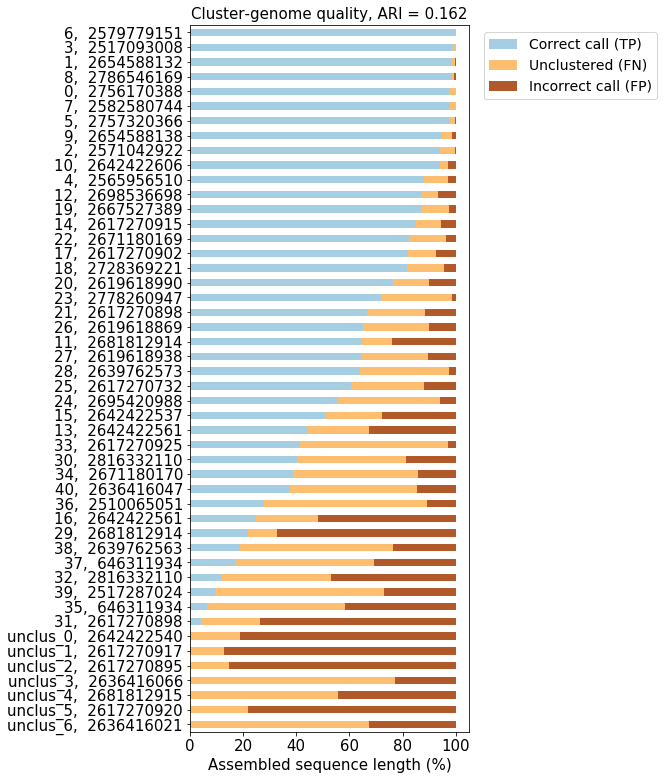

In [14]:
optimal5df_n.loc[78,'idxmax'] = 130
imp.reload(mock)
tsne5AbsCovOpt_ns,stats5absCovOpt_ns = mock.make_Opt_tSNE(optimal5df_n,maindir,'stats/feb15k5merWithAbsCov20190311t15:02:23noScaling2_all_tSNEs','feb15_5merAbsCovNoScaling3')  

# no scaling PCA and tSNE with PCA input

In [16]:
imp.reload(mock)
maindir = "Mock/Archaea_illuminaHS_low<20contigs/"
k5mer = pd.read_pickle(maindir+'stats/kmerdf__feb15.pickle')
statsdf = pd.read_pickle(maindir+'stats/statsdf__feb15.pickle')
contigdf_withcov = pd.read_pickle(maindir+'stats/contigdf_15feb_MockMetaWithCoverage_20190311_15:02:23')
savename = 'feb15k5merWithAbsCov20190311t15:02:23noScaling3'
keys = ['maindir','savename','coverage_included','scaling']
values = [maindir,savename,'YES',False]
kwds = dict(zip(keys,values))
tsnedf_5main,optimal5df,hdbsweep5 = mock.perform_complete_analysis(k5mer,contigdf_withcov,statsdf,**kwds)

Contig coverage added as dimension
building tSNE of all 1024 dimensions, scaling done


/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


finished building main tSNE, this took 662.87 seconds
performing cluster sweep of tSNE of all 1024 dimensions


/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:924: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:924: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:924: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:924: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:924: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:924: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:924: RuntimeWarning: divide by zero encountered in 

finished cluster sweep of main tSNE, this took 38.84 seconds
Total elapsed time is 11.70 minutes
Performing PCA...
PCA done and saved.
building tSNE of 18 PCs
finished building tSNE of 18 PCs, this took 109.37 seconds
performing cluster sweep of tSNE of 18 PCs
finished cluster sweep of tSNE with18PCs, this took 41.98 seconds
Total elapsed time is 14.35 minutes
building tSNE of 26 PCs
finished building tSNE of 26 PCs, this took 116.26 seconds
performing cluster sweep of tSNE of 26 PCs
finished cluster sweep of tSNE with26PCs, this took 41.62 seconds
Total elapsed time is 16.98 minutes
building tSNE of 38 PCs
finished building tSNE of 38 PCs, this took 112.14 seconds
performing cluster sweep of tSNE of 38 PCs
finished cluster sweep of tSNE with38PCs, this took 41.71 seconds
Total elapsed time is 19.55 minutes
building tSNE of 55 PCs
finished building tSNE of 55 PCs, this took 113.29 seconds
performing cluster sweep of tSNE of 55 PCs
finished cluster sweep of tSNE with55PCs, this took 41.

/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:924: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:924: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:924: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:924: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:924: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:924: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:924: RuntimeWarning: divide by zero encountered in 

finished cluster sweep of tSNE with162PCs, this took 41.37 seconds
Total elapsed time is 29.78 minutes
building tSNE of 234 PCs
finished building tSNE of 234 PCs, this took 115.38 seconds
performing cluster sweep of tSNE of 234 PCs


/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:924: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:924: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:924: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:924: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:924: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:924: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:924: RuntimeWarning: divide by zero encountered in 

finished cluster sweep of tSNE with234PCs, this took 41.85 seconds
Total elapsed time is 32.40 minutes
Finished everything.
Total elapsed time is 32.40 minutes


In [ ]:
s

In [ ]:
k5mer = pd.read_pickle(maindir+'stats/kmerdf__feb15.pickle')
k5PCA = perform_PCA(k5mer,1000)

In [ ]:
k6mer = pd.read_pickle(maindir+'stats/kmerdf_from_metagenome_fasta_6mer.pickle')
k6PCA = perform_PCA(k6mer,1000)

In [ ]:
k7PCA = perform_PCA(k7mer,1000)


In [ ]:
save_dir = 'Permafrost/FranklinBluffs/pickles/'
FBk6mer = pd.read_pickle(save_dir+'kmerdf_from_metagenome_fasta_6mer.pickle')
abs_cov = pd.read_pickle(save_dir+'FranklinBluffs_chipdf_bpcounts')
combined6merAbs = FBk6mer.join(abs_cov)
FBk6PCA = perform_PCA(FBk6mer,1000)

In [16]:
k5PCA.var().plot(label='5-mer',c='r')
k6PCA.var().plot(label='6-mer',c='g')
k7PCA.var().plot(label='7-mer',c='b')
FBk6PCA.var().plot(label='FB 6-mer',c='m')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1,1e4)
plt.legend()
plt.ylim(1e-1,1e4)

NameError: name 'k5PCA' is not defined

In [ ]:
k7mer.sum(axis=1).head()

In [ ]:
contig7mer['Sequence length'].head()

In [14]:
imp.reload(mock)
maindir = "Mock/Archaea_illuminaHS_low<20contigs/"
k5mer = pd.read_pickle(maindir+'stats/kmerdf__feb15.pickle')
statsdf = pd.read_pickle(maindir+'stats/statsdf__feb15.pickle')
contigdf_withcov = pd.read_pickle(maindir+'stats/contigdf_15feb_MockMetaWithCoverage_20190311_15:02:23')
savename = 'feb15k5merWithAbsCov20190311t15:02:23'
keys = ['maindir','savename','coverage_included']
values = [maindir,savename,'YES']
kwds = dict(zip(keys,values))
tsnedf_5main,optimal5df,hdbsweep5 = mock.perform_complete_analysis(k5mer,contigdf_withcov,statsdf,**kwds)

Contig coverage added as dimension
building tSNE of all 1024 dimensions


/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


finished building main tSNE, this took 697.75 seconds
performing cluster sweep of tSNE of all 1024 dimensions


/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in 

finished cluster sweep of main tSNE, this took 42.26 seconds
Total elapsed time is 12.33 minutes
Performing PCA...


/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


PCA done and saved.
building tSNE of 3 PCs
finished building tSNE of 3 PCs, this took 160.89 seconds
performing cluster sweep of tSNE of 3 PCs
No bin -01 in tSNE188
No bin -01 in tSNE203
No bin -01 in tSNE218
No bin -01 in tSNE232
No bin -01 in tSNE246
No bin -01 in tSNE261
No bin -01 in tSNE276
No bin -01 in tSNE290
finished cluster sweep of tSNE with3PCs, this took 46.45 seconds
Total elapsed time is 16.03 minutes
building tSNE of 4 PCs
finished building tSNE of 4 PCs, this took 158.74 seconds
performing cluster sweep of tSNE of 4 PCs


/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in 

finished cluster sweep of tSNE with4PCs, this took 44.42 seconds
Total elapsed time is 19.41 minutes
building tSNE of 6 PCs
finished building tSNE of 6 PCs, this took 156.88 seconds
performing cluster sweep of tSNE of 6 PCs
No bin -01 in tSNE58
No bin -01 in tSNE72
No bin -01 in tSNE87
No bin -01 in tSNE102
No bin -01 in tSNE116
No bin -01 in tSNE130
No bin -01 in tSNE145
No bin -01 in tSNE159
finished cluster sweep of tSNE with6PCs, this took 42.90 seconds
Total elapsed time is 22.74 minutes
building tSNE of 9 PCs
finished building tSNE of 9 PCs, this took 157.08 seconds
performing cluster sweep of tSNE of 9 PCs
finished cluster sweep of tSNE with9PCs, this took 43.83 seconds
Total elapsed time is 26.09 minutes
building tSNE of 13 PCs
finished building tSNE of 13 PCs, this took 157.54 seconds
performing cluster sweep of tSNE of 13 PCs


/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in 

finished cluster sweep of tSNE with13PCs, this took 41.41 seconds
Total elapsed time is 29.41 minutes
building tSNE of 18 PCs
finished building tSNE of 18 PCs, this took 160.04 seconds
performing cluster sweep of tSNE of 18 PCs


/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in 

finished cluster sweep of tSNE with18PCs, this took 40.95 seconds
Total elapsed time is 32.76 minutes
building tSNE of 26 PCs
finished building tSNE of 26 PCs, this took 182.11 seconds
performing cluster sweep of tSNE of 26 PCs


/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in 

finished cluster sweep of tSNE with26PCs, this took 53.62 seconds
Total elapsed time is 36.69 minutes
building tSNE of 38 PCs
finished building tSNE of 38 PCs, this took 201.06 seconds
performing cluster sweep of tSNE of 38 PCs
finished cluster sweep of tSNE with38PCs, this took 42.47 seconds
Total elapsed time is 40.75 minutes
building tSNE of 55 PCs
finished building tSNE of 55 PCs, this took 218.76 seconds
performing cluster sweep of tSNE of 55 PCs


/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in 

finished cluster sweep of tSNE with55PCs, this took 43.70 seconds
Total elapsed time is 45.12 minutes
building tSNE of 78 PCs
finished building tSNE of 78 PCs, this took 262.28 seconds
performing cluster sweep of tSNE of 78 PCs


/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in 

finished cluster sweep of tSNE with78PCs, this took 41.34 seconds
Total elapsed time is 50.18 minutes
building tSNE of 113 PCs
finished building tSNE of 113 PCs, this took 285.10 seconds
performing cluster sweep of tSNE of 113 PCs


/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in 

finished cluster sweep of tSNE with113PCs, this took 41.89 seconds
Total elapsed time is 55.63 minutes
building tSNE of 162 PCs
finished building tSNE of 162 PCs, this took 329.71 seconds
performing cluster sweep of tSNE of 162 PCs


/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in 

finished cluster sweep of tSNE with162PCs, this took 43.54 seconds
Total elapsed time is 61.86 minutes
building tSNE of 234 PCs
finished building tSNE of 234 PCs, this took 421.97 seconds
performing cluster sweep of tSNE of 234 PCs


/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:883: RuntimeWarning: invalid value encountered in double_scalars
  completeness = 1-HKC/HK
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:883: RuntimeWarning: invalid value encountered in double_scalars
  completeness = 1-HKC/HK
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:883: RuntimeWarning: invalid value encountered in double_scalars
  completeness = 1-HKC/HK
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:883: RuntimeWarning: invalid value encountered in double_scalars
  completeness = 1-HKC/HK
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:883: RuntimeWarning: invalid value encountered in double_scalars
  completeness = 1-HKC/HK
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:883: RuntimeWarning: invalid value encountered in double_scalars
  completeness = 1-HKC/HK
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:883: RuntimeWarning: invali

finished cluster sweep of tSNE with234PCs, this took 50.96 seconds
Total elapsed time is 69.74 minutes
building tSNE of 336 PCs
finished building tSNE of 336 PCs, this took 424.69 seconds
performing cluster sweep of tSNE of 336 PCs


/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:883: RuntimeWarning: invalid value encountered in double_scalars
  completeness = 1-HKC/HK
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:883: RuntimeWarning: invalid value encountered in double_scalars
  completeness = 1-HKC/HK
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:865: RuntimeWarning: divide by zero encountered in log
  HC = -np.sum(ncn*np.log(ncn))
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:883: RuntimeWarning: invalid value encounte

finished cluster sweep of tSNE with336PCs, this took 45.63 seconds
Total elapsed time is 77.58 minutes
building tSNE of 483 PCs
finished building tSNE of 483 PCs, this took 497.05 seconds
performing cluster sweep of tSNE of 483 PCs


/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:883: RuntimeWarning: invalid value encountered in double_scalars
  completeness = 1-HKC/HK
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:883: RuntimeWarning: invalid value encountered in double_scalars
  completeness = 1-HKC/HK
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:883: RuntimeWarning: invalid value encountered in double_scalars
  completeness = 1-HKC/HK
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:883: RuntimeWarning: invalid value encountered in double_scalars
  completeness = 1-HKC/HK
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:883: RuntimeWarning: invalid value encountered in double_scalars
  completeness = 1-HKC/HK
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:883: RuntimeWarning: invalid value encountered in double_scalars
  completeness = 1-HKC/HK
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:883: RuntimeWarning: invali

finished cluster sweep of tSNE with483PCs, this took 48.45 seconds
Total elapsed time is 86.67 minutes
building tSNE of 695 PCs
finished building tSNE of 695 PCs, this took 808.37 seconds
performing cluster sweep of tSNE of 695 PCs
No bin -01 in tSNE29
No bin -01 in tSNE44
No bin -01 in tSNE58
No bin -01 in tSNE72
No bin -01 in tSNE87
No bin -01 in tSNE116
No bin -01 in tSNE130
No bin -01 in tSNE145
No bin -01 in tSNE159
No bin -01 in tSNE174
No bin -01 in tSNE188
No bin -01 in tSNE203
No bin -01 in tSNE218
No bin -01 in tSNE232
No bin -01 in tSNE246
No bin -01 in tSNE261
No bin -01 in tSNE261
No bin -01 in tSNE276
No bin -01 in tSNE276
No bin -01 in tSNE290
No bin -01 in tSNE290
finished cluster sweep of tSNE with695PCs, this took 43.18 seconds
Total elapsed time is 100.86 minutes
Finished everything.
Total elapsed time is 100.87 minutes


In [15]:
imp.reload(mock)
maindir = "Mock/Archaea_illuminaHS_low<20contigs/"
k6mer = pd.read_pickle(maindir+'stats/kmerdf_from_metagenome_fasta_6mer.pickle')
statsdf = pd.read_pickle(maindir+'stats/statsdf__feb15.pickle')
contigdf_withcov = pd.read_pickle(maindir+'stats/contigdf_15feb_MockMetaWithCoverage_20190311_15:02:23')
savename = 'feb15k6merWithAbsCov20190311t15:02:23'
keys = ['maindir','savename','coverage_included']
values = [maindir,savename,'YES']
kwds = dict(zip(keys,values))
tsnedf_6main,optimal6df,hdbsweep6 = mock.perform_complete_analysis(k6mer,contigdf_withcov,statsdf,**kwds)

Contig coverage added as dimension
building tSNE of all 4096 dimensions


/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


finished building main tSNE, this took 2181.73 seconds
performing cluster sweep of tSNE of all 4096 dimensions
finished cluster sweep of main tSNE, this took 41.42 seconds
Total elapsed time is 37.05 minutes
Performing PCA...


/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


PCA done and saved.
building tSNE of 18 PCs
finished building tSNE of 18 PCs, this took 160.87 seconds
performing cluster sweep of tSNE of 18 PCs


/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  

finished cluster sweep of tSNE with18PCs, this took 41.67 seconds
Total elapsed time is 42.39 minutes
building tSNE of 26 PCs
finished building tSNE of 26 PCs, this took 177.03 seconds
performing cluster sweep of tSNE of 26 PCs


/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  

finished cluster sweep of tSNE with26PCs, this took 41.00 seconds
Total elapsed time is 46.03 minutes
building tSNE of 38 PCs
finished building tSNE of 38 PCs, this took 189.29 seconds
performing cluster sweep of tSNE of 38 PCs


/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  

finished cluster sweep of tSNE with38PCs, this took 42.94 seconds
Total elapsed time is 49.90 minutes
building tSNE of 55 PCs
finished building tSNE of 55 PCs, this took 221.64 seconds
performing cluster sweep of tSNE of 55 PCs


/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  

finished cluster sweep of tSNE with55PCs, this took 42.09 seconds
Total elapsed time is 54.29 minutes
building tSNE of 78 PCs
finished building tSNE of 78 PCs, this took 276.38 seconds
performing cluster sweep of tSNE of 78 PCs
finished cluster sweep of tSNE with78PCs, this took 41.18 seconds
Total elapsed time is 59.59 minutes
building tSNE of 113 PCs
finished building tSNE of 113 PCs, this took 323.42 seconds
performing cluster sweep of tSNE of 113 PCs


/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  

finished cluster sweep of tSNE with113PCs, this took 43.77 seconds
Total elapsed time is 65.71 minutes
building tSNE of 162 PCs
finished building tSNE of 162 PCs, this took 345.42 seconds
performing cluster sweep of tSNE of 162 PCs


/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  

finished cluster sweep of tSNE with162PCs, this took 45.46 seconds
Total elapsed time is 72.22 minutes
building tSNE of 234 PCs
finished building tSNE of 234 PCs, this took 381.30 seconds
performing cluster sweep of tSNE of 234 PCs


/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:885: RuntimeWarning: invalid value encountered in double_scalars
  
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:885: RuntimeWarning: invalid value encountered in double_scalars
  
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:885: RuntimeWarning: invalid value encountered in double_scalars
  
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:885: RuntimeWarning: invalid value encountered in double_scalars
  
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encounter

finished cluster sweep of tSNE with234PCs, this took 51.46 seconds
Total elapsed time is 79.44 minutes
building tSNE of 336 PCs
finished building tSNE of 336 PCs, this took 427.34 seconds
performing cluster sweep of tSNE of 336 PCs


/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:885: RuntimeWarning: invalid value encountered in double_scalars
  
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:885: RuntimeWarning: invalid value encountered in double_scalars
  
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:885: RuntimeWarning: invalid value encountered in double_scalars
  
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encountered in log
  HCK = 0
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:885: RuntimeWarning: invalid value encountered in double_scalars
  
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:867: RuntimeWarning: divide by zero encounter

finished cluster sweep of tSNE with336PCs, this took 44.02 seconds
Total elapsed time is 87.29 minutes
building tSNE of 483 PCs
finished building tSNE of 483 PCs, this took 446.48 seconds
performing cluster sweep of tSNE of 483 PCs
No bin -01 in tSNE203
No bin -01 in tSNE218
No bin -01 in tSNE232


/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:885: RuntimeWarning: invalid value encountered in double_scalars
  
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:885: RuntimeWarning: invalid value encountered in double_scalars
  
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:885: RuntimeWarning: invalid value encountered in double_scalars
  
/home/bojk/Data/minimeta_pyfiles/mock_metagenome_creation.py:885: RuntimeWarning: invalid value encountered in double_scalars
  


finished cluster sweep of tSNE with483PCs, this took 40.85 seconds
Total elapsed time is 95.42 minutes
building tSNE of 695 PCs
finished building tSNE of 695 PCs, this took 552.53 seconds
performing cluster sweep of tSNE of 695 PCs
No bin -01 in tSNE188
No bin -01 in tSNE203
No bin -01 in tSNE218
No bin -01 in tSNE232
No bin -01 in tSNE246
No bin -01 in tSNE261
No bin -01 in tSNE276
No bin -01 in tSNE290
finished cluster sweep of tSNE with695PCs, this took 37.47 seconds
Total elapsed time is 105.25 minutes
building tSNE of 1000 PCs
finished building tSNE of 1000 PCs, this took 690.72 seconds
performing cluster sweep of tSNE of 1000 PCs
No bin -01 in tSNE130
No bin -01 in tSNE145
No bin -01 in tSNE159
No bin -01 in tSNE174
No bin -01 in tSNE188
No bin -01 in tSNE203
No bin -01 in tSNE218
No bin -01 in tSNE232
No bin -01 in tSNE246
No bin -01 in tSNE261
No bin -01 in tSNE276
No bin -01 in tSNE290
finished cluster sweep of tSNE with1000PCs, this took 38.71 seconds
Total elapsed time is 11

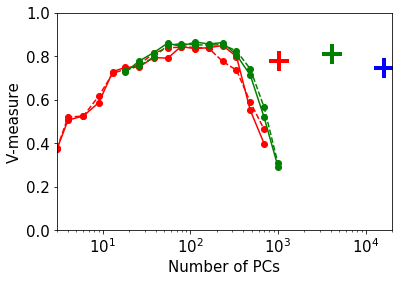

In [19]:
optimal5df = pd.read_pickle(maindir+'stats/feb15_optimalValues_perPC')
optimal6df = pd.read_pickle(maindir+'stats/feb15k6mers_optimalValues_perPC')
optimal7df = pd.read_pickle(maindir+'stats/feb15k7mers_optimalValues_perPC')
savename = 'feb15k5merWithAbsCov20190311t15:02:23'
optimal5df_cov = pd.read_pickle(maindir+'stats/'+savename+'_optimalValues_perPC')
savename = 'feb15k6merWithAbsCov20190311t15:02:23'
optimal6df_cov = pd.read_pickle(maindir+'stats/'+savename+'_optimalValues_perPC')


optimal5df['max'][:-1].plot(style='-o',c='r')
optimal5df_cov['max'][:-1].plot(style='--o',c='r')

optimal6df['max'][:-1].plot(style='-o',c='g')
optimal6df_cov['max'][:-1].plot(style='--o',c='g')
#optimal7df['max'][:-1].plot(style='-o',c='b')

plt.plot(4**5,optimal5df.iloc[-1,-1],'+r',ms=20,markeredgewidth=4)
plt.plot(4**6,optimal6df.iloc[-1,-1],'+g',ms=20,markeredgewidth=4)
plt.plot(4**7,optimal7df.iloc[-1,-1],'+b',ms=20,markeredgewidth=4)
plt.xscale('log')
plt.ylim(0,1)
plt.xlim(3,2e4)
plt.xlabel('Number of PCs')
plt.ylabel('V-measure')
plt.show()

Max V-measure = 0.857, with 78 PCs and minimum cluster size of 174 contigs.
2681812914
----------------------------------------------------
Sequence-based average genome recovery is 52.8%
Median genome recovery is 64.4%
Average recovery of clustered genomes is 70.38%
Median recovery of clustered genomes is 73.18%
Adjusted rand index = 0.151
Number of unseen genomes: 11/45, or 24.44%
----------------------------------------------------


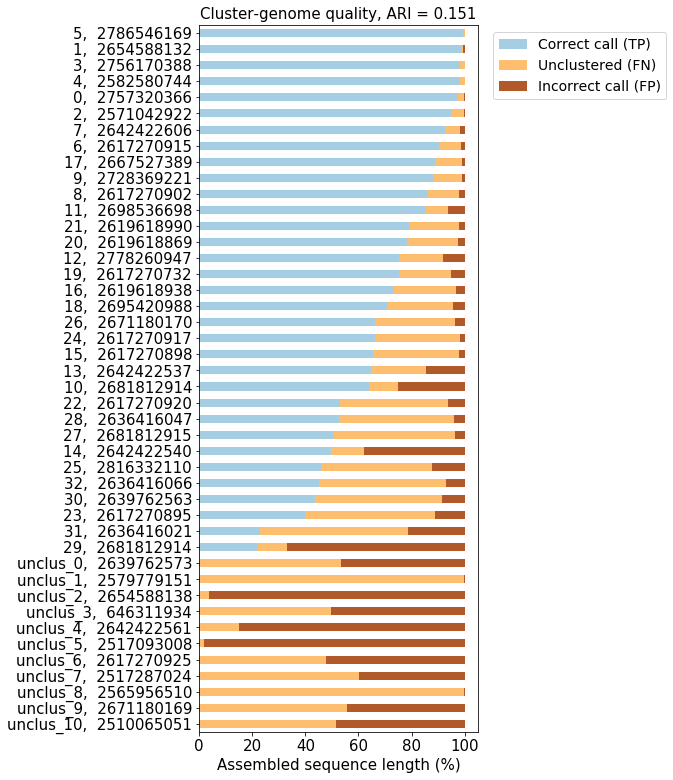

In [103]:
imp.reload(mock)
tsne6AbsCovOpt,stats6absCovOpt = mock.make_Opt_tSNE(optimal6df_cov,maindir,'stats/feb15k6merWithAbsCov20190311t15:02:23_all_tSNEs','feb15_6merAbsCov')    

In [56]:


stats6absCovOpt

,0,1,total length,# contigs,seq_len,seq_len_idx,num_contigs,num_contigs_idx,completeness,completeness(seqlen),...,GTgenome_unclustered,%genome_unclus,%genome_inother,%genome_unclus(seqlen),%genome_inother(seqlen),homogeneity,contamination,homogeneity(seqlen),contamination(seqlen),True_label
-1,1.784822,-2.127591,45080269.0,5608.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
0,39.441052,-39.582887,1668707.0,182.0,1668707.0,2757320366,182.0,2757320366,97.33,97.46,...,4.0,2.14,0.53,2.07,0.48,100.00,0.00,100.00,0.00,0
1,58.687658,0.518760,2043503.0,246.0,2043503.0,2654588132,246.0,2654588132,98.40,98.95,...,2.0,0.8,0.8,0.5,0.55,100.00,0.00,100.00,0.00,1
2,53.917242,24.917973,1664969.0,183.0,1664969.0,2571042922,183.0,2571042922,95.31,94.72,...,8.0,4.17,0.52,4.98,0.3,100.00,0.00,100.00,0.00,2
3,-58.227967,-5.926259,3006350.0,344.0,1778519.0,2756170388,201.0,2756170388,98.05,98.30,...,4.0,1.95,0,1.7,0,58.43,41.57,59.16,40.84,3
4,-37.739288,27.964042,3394566.0,394.0,3358023.0,2582580744,388.0,2582580744,98.73,98.09,...,5.0,1.27,0,1.91,0,98.48,1.52,98.92,1.08,4
5,-49.835695,19.665725,3674041.0,443.0,1866924.0,2786546169,226.0,2786546169,99.56,99.39,...,1.0,0.44,0,0.61,0,51.02,48.98,50.81,49.19,5
6,35.550310,33.702761,2679921.0,322.0,2667269.0,2617270915,320.0,2617270915,90.40,90.47,...,30.0,8.47,1.13,8.29,1.23,99.38,0.62,99.53,0.47,6
7,-26.768965,-36.380919,1883915.0,221.0,1872351.0,2642422606,219.0,2642422606,92.02,92.43,...,14.0,5.88,2.1,5.89,1.67,99.10,0.90,99.39,0.61,7
8,38.733639,10.913402,3286373.0,379.0,3255977.0,2617270902,375.0,2617270902,84.84,86.32,...,55.0,12.44,2.71,11.35,2.33,98.94,1.06,99.08,0.92,8


In [55]:


tsne6AbsCovOpt[tsne6AbsCovOpt.genome=='2681812914'].DBclusternum.value_counts()

 10    362
 29    113
-1      66
 11     17
 25      1
Name: DBclusternum, dtype: int64

In [69]:
tsne6AbsCovOpt[tsne6AbsCovOpt.DBclusternum!=-1]
keys = [f for f in stats6absCovOpt.index if len(str(f))<3]

In [62]:
tsne6AbsCovOpt[(tsne6AbsCovOpt.DBclusternum==29)].groupby('genome').sum()['Sequence length'].sort_values()                

genome
2642422537       5324
2617270917       8040
2617270895      13163
2667527389      27367
2617270915      27423
2671180169      29112
2728369221      30537
2636416047      34420
2617270732      34531
2695420988      37216
2671180170      38111
2617270898      39877
2619618938      40446
2636416021      40448
2617270925      40658
2617270902      54018
2619618869      68866
2619618990      68980
2639762573      70561
2681812915      99063
2517287024     161470
2636416066     175420
2510065051     190230
2639762563     248948
2698536698     268636
646311934      289783
2778260947     350935
2816332110     369091
2681812914    1037492
Name: Sequence length, dtype: int64

In [63]:
tsne6AbsCovOpt[(tsne6AbsCovOpt.DBclusternum==10)].groupby('genome').sum()['Sequence length'].sort_values()                

genome
2681812914    2999698
Name: Sequence length, dtype: int64

In [72]:
keys = [f for f in stats6absCovOpt.index if len(str(f))<3]
values = stats6absCovOpt.loc[keys,'seq_len_idx']
dict(zip(keys,values))

{-1: nan,
 0: '2757320366',
 1: '2654588132',
 2: '2571042922',
 3: '2756170388',
 4: '2582580744',
 5: '2786546169',
 6: '2617270915',
 7: '2642422606',
 8: '2617270902',
 9: '2728369221',
 10: '2681812914',
 11: '2698536698',
 12: '2778260947',
 13: '2642422537',
 14: '2642422540',
 15: '2617270898',
 16: '2619618938',
 17: '2667527389',
 18: '2695420988',
 19: '2617270732',
 20: '2619618869',
 21: '2619618990',
 22: '2617270920',
 23: '2617270895',
 24: '2617270917',
 25: '2816332110',
 26: '2671180170',
 27: '2681812915',
 28: '2636416047',
 29: '2681812914',
 30: '2639762563',
 31: '2636416021',
 32: '2636416066'}

In [96]:
keys = list(stats6absCovOpt['seq_len_idx']);values = list(range(-1,len(keys)))
mapper = dict(zip(keys,values))
counts = stats6absCovOpt.seq_len_idx.value_counts()
doubles = counts[counts>1].index.values
for dob in doubles:
    print(dob)
    cluster = tsne6AbsCovOpt[tsne6AbsCovOpt.genome==dob].groupby('DBclusternum').sum()['Sequence length'].idxmax()
    mapper[dob] = cluster
stats6absCovOpt['True_label'] = stats6absCovOpt['seq_len_idx'].map(mapper)
tsne6AbsCovOpt['True_label'] = tsne6AbsCovOpt['genome'].map(mapper)
tsne6AbsCovOpt['True_label'] = tsne6AbsCovOpt['True_label'].astype(int)
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(list(tsne6AbsCovOpt['True_label']),list(tsne6AbsCovOpt['DBclusternum']))
stats6absCovOpt.head()

2681812914


,0,1,total length,# contigs,seq_len,seq_len_idx,num_contigs,num_contigs_idx,completeness,completeness(seqlen),...,GTgenome_unclustered,%genome_unclus,%genome_inother,%genome_unclus(seqlen),%genome_inother(seqlen),homogeneity,contamination,homogeneity(seqlen),contamination(seqlen),True_label
-1,1.784822,-2.127591,45080269.0,5608.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
0,39.441052,-39.582887,1668707.0,182.0,1668707.0,2757320366,182.0,2757320366,97.33,97.46,...,4.0,2.14,0.53,2.07,0.48,100.00,0.00,100.00,0.00,0
1,58.687658,0.518760,2043503.0,246.0,2043503.0,2654588132,246.0,2654588132,98.40,98.95,...,2.0,0.8,0.8,0.5,0.55,100.00,0.00,100.00,0.00,1
2,53.917242,24.917973,1664969.0,183.0,1664969.0,2571042922,183.0,2571042922,95.31,94.72,...,8.0,4.17,0.52,4.98,0.3,100.00,0.00,100.00,0.00,2
3,-58.227967,-5.926259,3006350.0,344.0,1778519.0,2756170388,201.0,2756170388,98.05,98.30,...,4.0,1.95,0,1.7,0,58.43,41.57,59.16,40.84,3


In [105]:

from sklearn import metrics
metrics.fowlkes_mallows_score(list(tsne6AbsCovOpt['True_label']),list(tsne6AbsCovOpt['DBclusternum']))
metrics.v_measure_score(list(tsne6AbsCovOpt['True_label']),list(tsne6AbsCovOpt['DBclusternum']))

0.6541644907342279

0.15053658739198156